# HW 9


## What about pdfs?

Often when we are analyzing text from the internet or journals, the document is rendered as a pdf. PDF stands for "portable document format" and was first developed by Adobe in the 90s and they used to be tough to convert to text but...not any more! Let's look at some ways we can do this: 

### Pdf extraction technique 1: curl
curl is a command-line tool used to transfer data to and from a server using various network protocols. It’s commonly used for making HTTP requests, and it's widely available on Unix-like operating systems, including Linux and macOS. It also works in windows, don't worry! 

Curl is extremely versatile and supports many protocols, such as HTTP, HTTPS, FTP, and more, making it useful for tasks like downloading files, interacting with APIs, and even testing servers.
t 
Here is a pdf of a Conference Call of the Federal Open Market Committee on 
January 21, 2008  www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf 

Let's extract the text:

In [4]:
#!pip install pypdf

In [5]:
#!pip install PyPDF2

In [6]:
#Your code here:
!curl -O https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf 

In [15]:
## Run this code:
from pypdf import PdfReader

reader = PdfReader("FOMC20080121confcall.pdf")
number_of_pages = len(reader.pages)
text = ''.join([page.extract_text() for page in reader.pages])
#print(text)

## Problem with curl...it doesn't always work!
Sometimes issues will arise when using curl. These can stem from problems with redirects from the website, or a deliberate defense against scraping. There is, however, ways around this. 

### Using requests method

In [13]:
#run this code:
!curl -O https://arxiv.org/abs/2212.08073

In [141]:
## Run this code:
from pypdf import PdfReader

reader = PdfReader("2212.08073")
number_of_pages = len(reader.pages)
text = ''.join([page.extract_text() for page in reader.pages])
print(text)

invalid pdf header: b'<?xml'
EOF marker not found


PdfStreamError: Stream has ended unexpectedly

This throws an error "Stream has ended unexpectedly" Let's try this another way.

Here is an article on "Constitutional AI" from the folks at Anthropic that is their tech manifesto on ethical ai:
"https://arxiv.org/pdf/2212.08073.pdf"

In [17]:
import requests
from PyPDF2 import PdfReader
from io import BytesIO

# Step 1: Fetch the PDF directly from arXiv
url = "https://arxiv.org/pdf/2212.08073.pdf"
response = requests.get(url)

# Check if the response is a PDF
if response.headers['Content-Type'] == 'application/pdf':
    pdf_file = BytesIO(response.content)
    
    # Step 2: Read the PDF content
    reader = PdfReader(pdf_file)
    document_text = ""
    for page in reader.pages:
        document_text += page.extract_text()
    
    # Display the first 500 characters to verify content
    print(document_text[:500])
else:
    print("Failed to download PDF. Received content type:", response.headers['Content-Type'])


Constitutional AI: Harmlessness from AI Feedback
Yuntao Bai, Saurav Kadavath, Sandipan Kundu, Amanda Askell, Jackson Kernion,
Andy Jones, Anna Chen, Anna Goldie, Azalia Mirhoseini, Cameron McKinnon,
Carol Chen, Catherine Olsson, Christopher Olah, Danny Hernandez, Dawn Drain,
Deep Ganguli, Dustin Li, Eli Tran-Johnson, Ethan Perez, Jamie Kerr, Jared Mueller,
Jeffrey Ladish, Joshua Landau, Kamal Ndousse, Kamile Lukosuite, Liane Lovitt,
Michael Sellitto, Nelson Elhage, Nicholas Schiefer, Noemi Merc


Great! That worked!! 

## Lets apply what we have learned on the 2008 Crisis and the Fed
The global financial crisis (GFC) refers to the period of extreme stress in global financial markets and banking systems between mid 2007 and early 2009. During the GFC, a downturn in the US housing market was a catalyst for a financial crisis that spread from the United States to the rest of the world through linkages in the global financial system. Many banks around the world incurred large losses and relied on government support to avoid bankruptcy. Millions of people lost their jobs as the major advanced economies experienced their deepest recessions since the Great Depression in the 1930s.

The Federal Reserve conference calls are a good way to track the sentiment that the Fed had toward the crisis. Did they know how bad it was? Did they think they could fix it? Starting in January of 2008, ending in October of 2008 map the sentiment of the Fed reserve calls.

Here are your documents: Jan 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf Mar 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf July 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf Sept 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf Oct 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf


You will need to convert these pdf into text to process.

In [16]:
import requests
from PyPDF2 import PdfReader
from io import BytesIO

# List of URLs to download the PDF documents, each with a label for easy reference
pdf_urls = {
    "Jan 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf",
    "Mar 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf",
    "July 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf",
    "Sept 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf",
    "Oct 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf"
}

# Function to fetch and convert a PDF document from a URL into text
def fetch_pdf_text(url):
    """
    Fetches a PDF from the specified URL, reads its contents,
    and converts it to plain text.
    Parameters:
        url (str): The URL of the PDF file to download and read.
    Returns:
        str: The extracted text from the PDF if successful, or None if there was an issue.
    """
    # Send a GET request to download the PDF file
    response = requests.get(url)
    
    # Check if the response contains a PDF file by verifying the content type
    if response.headers['Content-Type'] == 'application/pdf':
        pdf_file = BytesIO(response.content)  # Convert PDF content to a BytesIO object for reading
        reader = PdfReader(pdf_file)  # Initialize a PdfReader object
        
        # Extract text from each page in the PDF
        document_text = ""
        for page in reader.pages:
            text = page.extract_text()  # Extract text from the current page
            if text:  # Only add if there is actual text (some pages may be blank)
                document_text += text  # Append extracted text to the document_text variable
        
        return document_text  # Return the full text extracted from the PDF
    else:
        # Print an error message if the response is not a PDF
        print(f"Failed to download PDF from {url}. Received content type: {response.headers['Content-Type']}")
        return None  # Return None to indicate failure

# Loop through each document in pdf_urls, process it, and display a text preview
for title, url in pdf_urls.items():
    print(f"\nProcessing {title} document...")
    pdf_text = fetch_pdf_text(url)  # Fetch and extract text from the PDF
    
    # If text was successfully extracted, display a preview
    if pdf_text: # If text was successfully extracted, display a preview
        print(f"==========================================================================================")
        print(pdf_text[:200])  # Display the first 500 characters as a preview
        print("\n===============================End of Preview===========================================\n")
    else:
        # Indicate if there was an issue extracting text for a specific document
        print(f"Could not extract text from {title} document.")


Processing Jan 2008 document...
Conference Call  of the Federal Open Market Committee on 
January 21, 2008 
 
A conference call of the Federal Open Market Committee was held on  Monday, January 
21, 2008, at 6:00 p.m.  Those present

===============================End of Preview===========================================


Processing Mar 2008 document...
Conference Call  of the Federal Open Market Committee on 
March 10 , 2008 
 
A conference call of the Federal Open Market Committee was held on Mon day, March 
10, 2008, at 7:15 p.m.  Those present we

===============================End of Preview===========================================


Processing July 2008 document...
Conference Call  of the Federal Open Market Committee on 
July 24, 2008 
 
A joint conference call of the Federal Open Market Committee and Board of Governors 
of the Federal Reserve System was held o

===============================End of Preview===========================================


Processing Sept 2008 do

Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.


In [24]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Define stopwords in English
stop_words = set(stopwords.words("english"))

# Function to clean and tokenize text
def clean_and_tokenize(text):
    """
    Cleans the input text by removing punctuation, stopwords, and tokenizes it into words.
    Parameters:
        text (str): The raw text to be cleaned and tokenized.
    Returns:
        list: A list of words after cleaning and filtering.
    """
    # Remove non-alphabetic characters and convert text to lowercase
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    
    # Filter out stopwords
    filtered_words = [word for word in words if word not in stop_words]
    
    return filtered_words

# Perform word frequency analysis for each document
for title, url in pdf_urls.items():
    print(f"\nProcessing {title} document...")
    pdf_text = fetch_pdf_text(url)
    
    if pdf_text:
        # Clean and tokenize the text
        words = clean_and_tokenize(pdf_text)
        
        # Count word frequencies
        word_freq = Counter(words)
        
        # Display the 10 most common words
        print(f"--- Top 5 words in {title} document ---")
        for word, freq in word_freq.most_common(8):
            print(f"{word}: {freq}")
        print("\n========================================================================================\n")
    else:
        print(f"Could not extract text from {title} document.")


Processing Jan 2008 document...
--- Top 5 words in Jan 2008 document ---
think: 89
mr: 74
markets: 67
market: 66
chairman: 59
would: 56
financial: 49
january: 43



Processing Mar 2008 document...
--- Top 5 words in Mar 2008 document ---
mr: 99
would: 90
think: 86
chairman: 80
market: 78
securities: 58
markets: 52
collateral: 52



Processing July 2008 document...
--- Top 5 words in July 2008 document ---
would: 174
think: 122
mr: 111
chairman: 87
president: 78
collateral: 77
credit: 69
day: 63



Processing Sept 2008 document...
--- Top 5 words in Sept 2008 document ---
billion: 65
mr: 57
chairman: 43
would: 28
market: 24
bernanke: 23
federal: 22
reserves: 22



Processing Oct 2008 document...
--- Top 5 words in Oct 2008 document ---
mr: 91
think: 82
chairman: 75
inflation: 48
thank: 45
financial: 45
market: 43
would: 43





Processing Jan 2008 document...




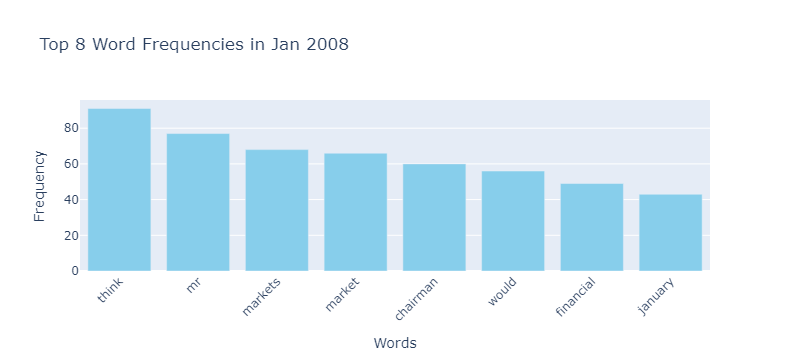


Processing Mar 2008 document...




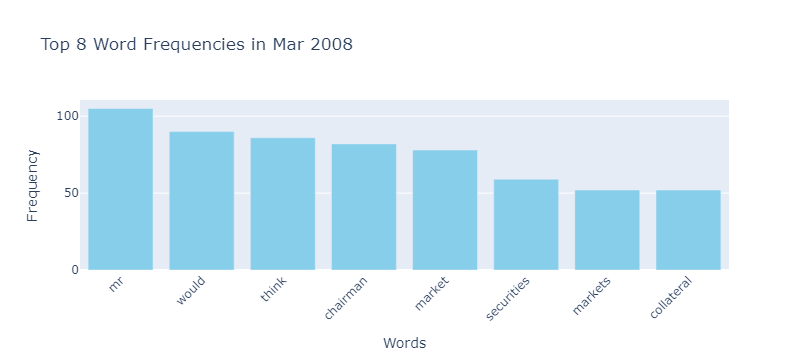


Processing July 2008 document...




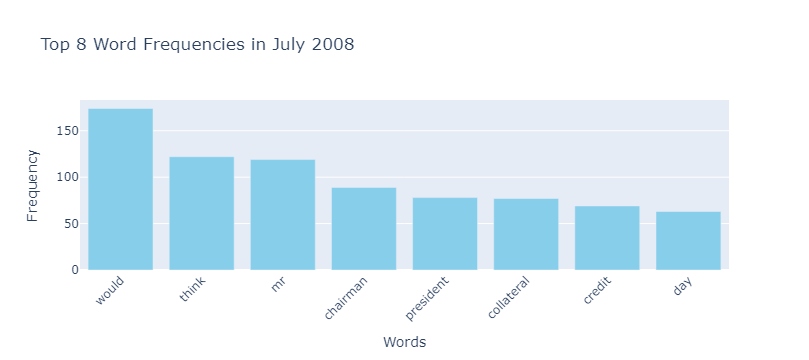


Processing Sept 2008 document...




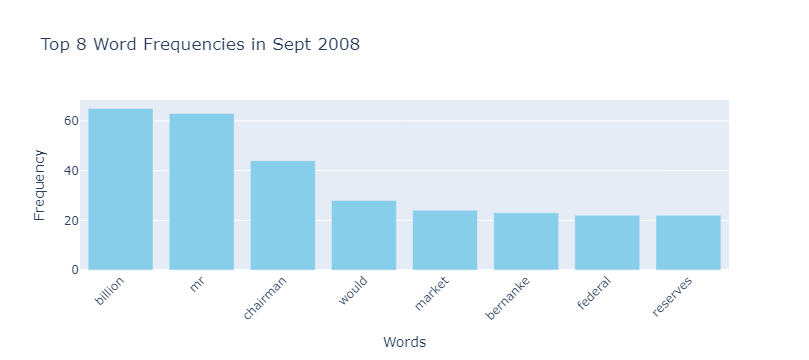


Processing Oct 2008 document...




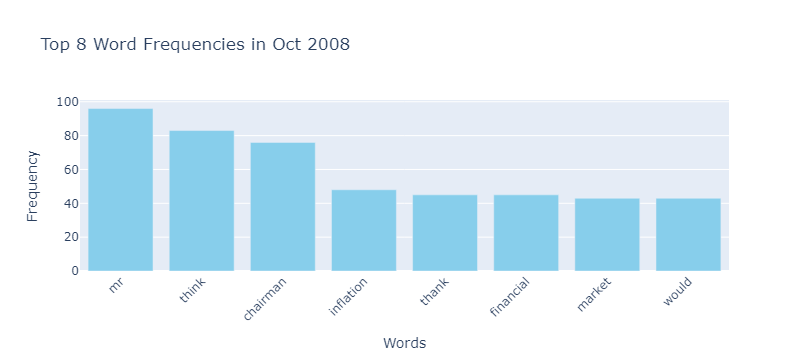

In [67]:
import plotly.express as px
from collections import Counter

# Function to plot word frequencies using Plotly
def plot_word_frequencies(word_freq, title):
    """
    Plots an interactive bar chart of word frequencies using Plotly Express.
    Parameters:
        word_freq (Counter): A Counter object with word frequencies.
        title (str): Title for the plot.
    """
    # Get the 8 most common words and their frequencies
    most_common_words = word_freq.most_common(8)
    words, frequencies = zip(*most_common_words)  # Unpack into two lists

    # Create a DataFrame for Plotly
    df = pd.DataFrame({"Word": words, "Frequency": frequencies})

    # Create an interactive bar plot using Plotly Express
    fig = px.bar(
        df,
        x="Word",
        y="Frequency",
        title=f"Top 8 Word Frequencies in {title}",
        labels={"Word": "Words", "Frequency": "Frequency"},
        color_discrete_sequence=["skyblue"]
    )
    
    # Customize layout for readability
    fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for readability
    fig.show()

# Perform word frequency analysis and plot results for each document
for title, url in pdf_urls.items():
    print(f"\nProcessing {title} document...")
    print("\n========================================================================================\n")
    pdf_text = fetch_pdf_text(url)
    
    if pdf_text:
        # Clean and tokenize the text
        words = clean_and_tokenize(pdf_text)
        
        # Count word frequencies
        word_freq = Counter(words)
        
        # Plot word frequencies with Plotly
        plot_word_frequencies(word_freq, title)
    else:
        print(f"Could not extract text from {title} document.")


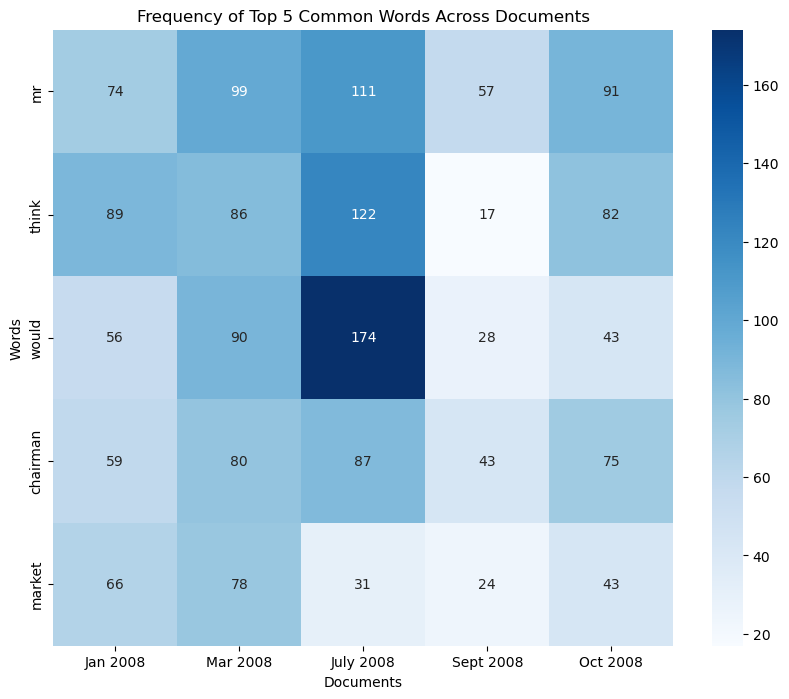

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dictionary to store word frequencies for each document
document_word_counts = {}

# Analyze each document and store top word frequencies
for title, url in pdf_urls.items():
    pdf_text = fetch_pdf_text(url)
    if pdf_text:
        words = clean_and_tokenize(pdf_text)
        word_freq = Counter(words)
        document_word_counts[title] = word_freq

# Aggregate all words to find the most common across all documents
all_words = Counter()
for word_freq in document_word_counts.values():
    all_words.update(word_freq)

# Identify the top 10 words across all documents
top_common_words = [word for word, freq in all_words.most_common(5)]

# Create a DataFrame for the heatmap
# Set dtype to float when creating the DataFrame
heatmap_data = pd.DataFrame(index=top_common_words, columns=document_word_counts.keys(), dtype=float).fillna(0)

# Populate the DataFrame with word frequencies for each document
for title, word_freq in document_word_counts.items():
    for word in top_common_words:
        heatmap_data.loc[word, title] = word_freq[word]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt="g")
plt.title("Frequency of Top 5 Common Words Across Documents")
plt.xlabel("Documents")
plt.ylabel("Words")
plt.show()


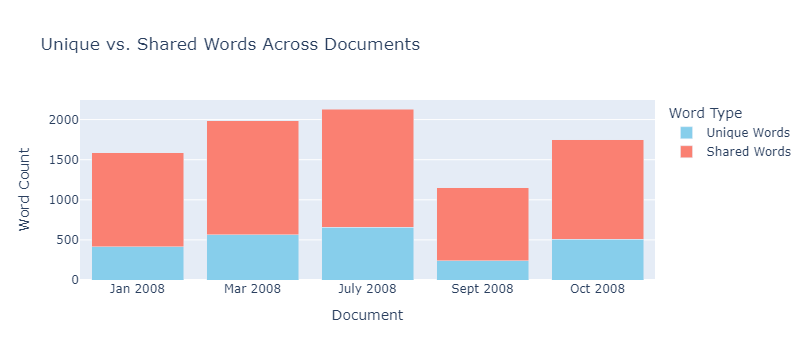

In [63]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for unique and shared word counts
df = pd.DataFrame({
    "Document": list(pdf_urls.keys()),
    "Unique Words": [unique_word_counts[title] for title in pdf_urls.keys()],
    "Shared Words": [shared_word_counts[title] for title in pdf_urls.keys()]
})

# Melt the DataFrame to long format for stacked bar plotting in Plotly
df_melted = df.melt(id_vars="Document", var_name="Word Type", value_name="Count")

# Plotting the stacked bar chart with Plotly Express
fig = px.bar(
    df_melted,
    x="Document",
    y="Count",
    color="Word Type",
    title="Unique vs. Shared Words Across Documents",
    labels={"Count": "Word Count", "Document": "Document"},
    color_discrete_map={"Unique Words": "skyblue", "Shared Words": "salmon"}
)

# Customize the layout
fig.update_layout(
    xaxis_title="Document",
    yaxis_title="Word Count",
    legend_title="Word Type",
    barmode="stack",  # Stack bars
)

# Show the plot
fig.show()


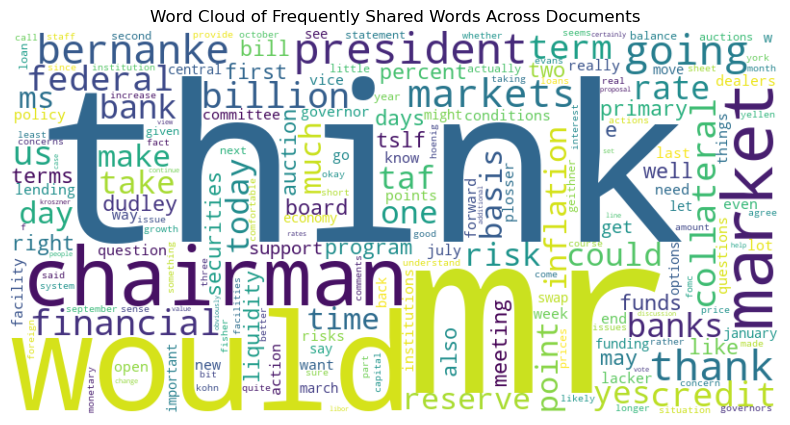

In [40]:
# Using Word Cloud
# Combine word frequencies from all documents
combined_word_counts = Counter()
for word_freq in document_word_counts.values():
    combined_word_counts.update(word_freq)

# Identify words that are common across multiple documents
common_words = Counter()
for word, count in combined_word_counts.items():
    # Count how many documents contain this word
    doc_count = sum(1 for doc_words in document_word_counts.values() if word in doc_words)
    if doc_count > 1:  # Include only words that appear in multiple documents
        common_words[word] = count


#Visualization using Wordcloud

from wordcloud import WordCloud
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Frequently Shared Words Across Documents")
plt.show()


Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?


In [42]:
#Your code here and EXPLANATION here:
# Using a dictionary with randomly generated words. I generated similar words with the help of ChatGPT

# Sample dictionary of phrases indicating an unprecedented or severe economic situation
key_phrases = [
    "unprecedented", "unique", "record-breaking", "not seen since", "once-in-a-lifetime",
    "severe", "extreme", "worst ever", "Great Depression", "worse", "worst since 1930s",
    "worse than Great Depression", "not seen since World War II",
    "crisis", "turmoil", "emergency", "catastrophe", "meltdown", "systemic risk",
    "instability", "collapse", "downfall", "breakdown", "crash", "failure",
    "urgent", "emergency measures", "immediate action", "rapid response", 
    "critical condition", "alarm", "emergency intervention",
    "recession", "economic downturn", "subprime mortgage crisis", "housing bubble", 
    "liquidity crisis", "credit crunch", "banking collapse", "unemployment spike", "risk",
    "bank bailouts", "interest rate cuts", "market crash", "uncertainty", "failing"
]

# Store matches from each document
evidence = {}

# Search each document for evidence
for title, url in pdf_urls.items():
    pdf_text = fetch_pdf_text(url)
    
    if pdf_text:
        sentences = pdf_text.split(".")  # Split text into sentences
        found_phrases = []
        
        # Search each sentence for phrases in the custom dictionary
        for sentence in sentences:
            for phrase in key_phrases:
                if phrase in sentence.lower():  # Case-insensitive match
                    found_phrases.append(sentence.strip())
                    break  # Stop searching after the first match in this sentence
        
        # Store results if there are any matches
        if found_phrases:
            evidence[title] = found_phrases

# Combine all evidence sentences into a single text
all_evidence_text = " ".join([" ".join(phrases) for phrases in evidence.values()])

# Print only the first 700 words from the evidence
first_700_words = " ".join(all_evidence_text.split()[:300])  # Split by words and get the first 700 (to avoid printing too much words)
print(first_700_words)


They are now as narrow as they’ve been since the market turmoil began For t hose without liquidity support , either they will be converted to longer- dated securities , which the investors will be surprised to find out they are holding, or th e dealers will have to take them back on their books to prevent the auctions from failing Third, financial institutions have to mark down the va lue of the guarantors’ insurance as their financial conditions worsen So it is not trivial to transfer this risk from the monoline s to the financial institutions given the distinction that the monoline s do not have to mark to market but financial institutions that use their insurance do So it’s quite a big difference in terms of the market impact as you transfer that risk from the monoline guarantors to the financial institutions that b ought that insurance In the currency market, we saw the sort of normal risk - January 21, 2008 5 of 32aversion behavior The e uro underperformed, the dollar was in the m

In [44]:
# Initialize a dictionary to store the counts for each document
phrase_counts = {title: {phrase: 0 for phrase in key_phrases} for title in pdf_urls.keys()}

# Count occurrences of each key phrase in each document
for title, url in pdf_urls.items():
    pdf_text = fetch_pdf_text(url)
    
    if pdf_text:
        # Lowercase the text for case-insensitive matching
        text = pdf_text.lower()
        
        # Count occurrences of each phrase in the document
        for phrase in key_phrases:
            count = text.count(phrase)  # Count the occurrences of the phrase
            phrase_counts[title][phrase] = count

# Convert the nested dictionary to a DataFrame
phrase_counts_df = pd.DataFrame(phrase_counts).T  # Transpose to have documents as rows and phrases as columns

# Filter out columns (phrases) and rows (documents) with all zeros
phrase_counts_df = phrase_counts_df.loc[:, (phrase_counts_df != 0).any(axis=0)]  # Remove columns with all zeros
phrase_counts_df = phrase_counts_df[(phrase_counts_df != 0).any(axis=1)]         # Remove rows with all zeros

# Display the filtered DataFrame
phrase_counts_df

,unprecedented,severe,extreme,worse,crisis,turmoil,systemic risk,breakdown,crash,failure,alarm,recession,economic downturn,liquidity crisis,credit crunch,risk,market crash,uncertainty,failing
Jan 2008,0,7,0,3,6,1,0,0,0,0,0,19,1,0,0,50,0,2,1
Mar 2008,1,1,0,4,12,0,1,0,0,4,1,1,0,1,0,46,0,2,0
July 2008,0,1,1,7,2,0,0,0,0,6,1,0,0,1,0,33,0,3,3
Sept 2008,0,1,0,0,1,2,3,0,0,1,0,0,0,0,0,5,0,0,1
Oct 2008,2,1,4,4,7,2,0,1,1,1,0,3,0,0,2,32,1,4,0


In [46]:
# Step 1: Filter out columns and rows with all zeros (as done previously)
phrase_counts_df = pd.DataFrame(phrase_counts).T  # Transpose to have documents as rows and phrases as columns
phrase_counts_df = phrase_counts_df.loc[:, (phrase_counts_df != 0).any(axis=0)]  # Remove columns with all zeros
phrase_counts_df = phrase_counts_df[(phrase_counts_df != 0).any(axis=1)]         # Remove rows with all zeros

# Step 2: Reshape the DataFrame to long format to show only non-zero counts
non_zero_df = phrase_counts_df.melt(ignore_index=False, var_name="Phrase", value_name="Count")
non_zero_df = non_zero_df[non_zero_df["Count"] > 0]  # Filter to keep only non-zero counts

# Display the resulting DataFrame
non_zero_df.sort_values(by=["Count"], ascending=False, inplace=True)
non_zero_df.reset_index(inplace=True)
non_zero_df.rename(columns={'index': 'Document'}, inplace=True)
non_zero_df


,Document,Phrase,Count
0,Jan 2008,risk,50
1,Mar 2008,risk,46
2,July 2008,risk,33
3,Oct 2008,risk,32
4,Jan 2008,recession,19
5,Mar 2008,crisis,12
6,Oct 2008,crisis,7
7,Jan 2008,severe,7
8,July 2008,worse,7
9,Jan 2008,crisis,6


               Phrase  Count
0                risk    166
1              crisis     28
2           recession     23
3               worse     18
4             failure     12
5         uncertainty     11
6              severe     11
7             turmoil      5
8             extreme      5
9             failing      5
10      systemic risk      4
11      unprecedented      3
12              alarm      2
13      credit crunch      2
14   liquidity crisis      2
15       market crash      1
16          breakdown      1
17  economic downturn      1
18              crash      1




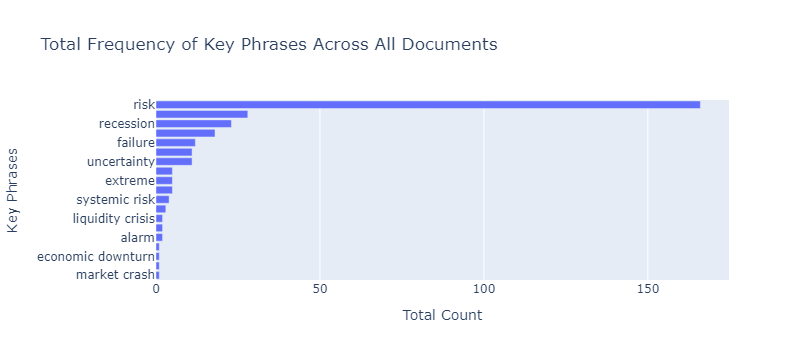

In [50]:
import plotly.express as px
# Sum the counts of each phrase across all documents
total_phrase_counts = non_zero_df.groupby("Phrase")["Count"].sum().sort_values(ascending=False)

# Convert the result to a DataFrame for easier viewing
total_phrase_counts_df = total_phrase_counts.reset_index()

# Display the resulting DataFrame
print(total_phrase_counts_df)

print("\n=======================================================================================================\n")

# Plotting the total counts of each unique phrase using Plotly
fig = px.bar(
    total_phrase_counts_df,
    x="Count",
    y="Phrase",
    orientation="h",  # Horizontal bar chart
    title="Total Frequency of Key Phrases Across All Documents",
    labels={"Count": "Total Count", "Phrase": "Key Phrases"}
)

# Customize the layout for better readability
fig.update_layout(
    xaxis_title="Total Count",
    yaxis_title="Key Phrases",
    yaxis=dict(categoryorder="total ascending")  # Sort the y-axis by total count
)

# Display the Plotly chart
fig.show()

#### Approaching the question using a Vector Based Approach

In [223]:
#!pip install sentence-transformers

                                             Sentence  Similarity Score
0   But at this point we are facing , potentially ...          0.673194
1                    We have to \naddress this crisis          0.665065
12  Clearly financial markets are experiencing gre...          0.643858
2   As we look at the \ndata, we are on the edge o...          0.634228
9   I like in the statement the \nstressing of the...          0.622979
10  I think there’s a real risk \nof a very sharp ...          0.621979
7   We have been very constrained throughout this ...          0.619838
3   I am concerned also how severe a recession cou...          0.609285
5   I think we are at a kind of juncture now where...          0.609007
4   I would echo \nBill Poole a bit in terms of un...          0.607351


This table shows sentences from Federal Reserve documents that align closely with the idea of an 'unprecedented crisis.' These statements carry a sense of urgency and concern, with phrases like 'facing pote

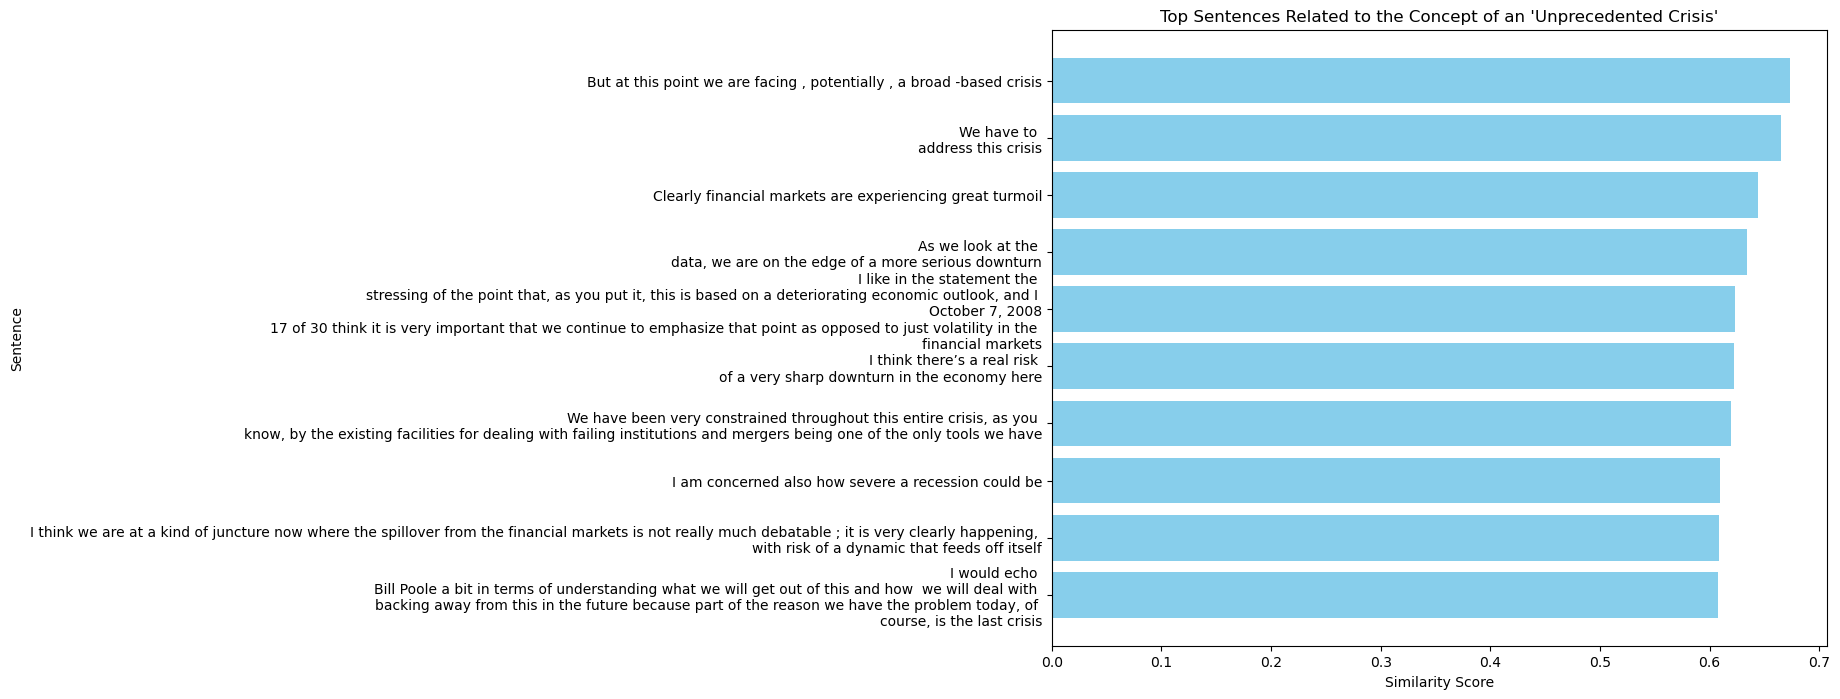

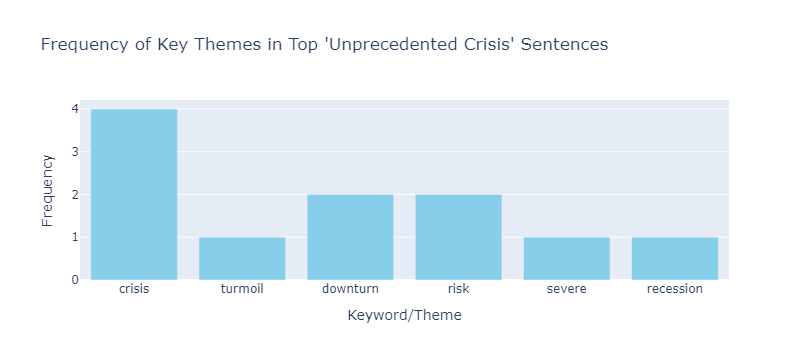

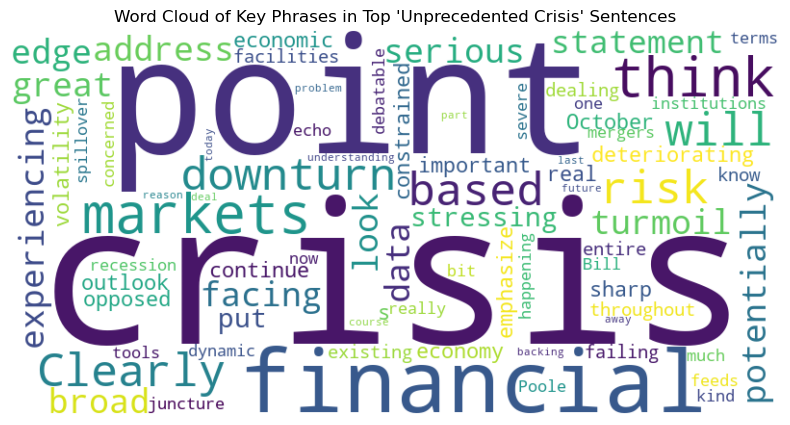

In [77]:
# Suppress the specific tqdm warning we were seeing in the output
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tqdm.autonotebook")

from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load a pre-trained model from sentence-transformers to get sentence embeddings
# (Using a lightweight model here for efficiency)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define a list of example sentences to represent what we mean by an "unprecedented crisis"
# These sentences capture the kind of language we'd expect to see if the Fed recognized 
# the severity and uniqueness of the 2008 crisis
target_concept_sentences = [
    "This situation is unlike anything we have seen before.",
    "The crisis is unprecedented in scope and impact.",
    "This is a historic economic downturn.",
    "We are experiencing a once-in-a-lifetime crisis.",
    "The severity of this crisis is unparalleled.",
    "The economic collapse is worse than anything since the Great Depression.",
    "The financial system is facing an existential threat.",
    "This meltdown is unprecedented and requires immediate action.",
    "This emergency is unlike any in recent history.",
    "We have reached a tipping point in the financial system.",
    "This is a time of unparalleled economic instability.",
    "The impact is devastating and requires swift intervention.",
    "The world is witnessing a financial disaster of historic proportions.",
    "The economy is in uncharted territory, and drastic measures are needed.",
    "This economic emergency is comparable only to the Great Depression.",
    "This is a critical moment that could reshape the financial landscape.",
    "We are facing a crisis not seen since World War II.",
    "The current economic conditions are unprecedented in modern times.",
    "This financial catastrophe has no precedent in recent history.",
    "We are witnessing an economic upheaval unlike anything before.",
    "The scale of this disaster is beyond what anyone could imagine.",
    "This is the worst financial crisis of our generation.",
    "We have entered a period of extreme economic volatility.",
    "The financial collapse is worse than the Great Recession.",
    "This crisis has profound and far-reaching consequences."
]

# Encode the example sentences to create embeddings for each, 
# which will serve as our reference for the "unprecedented crisis" concept
target_concept_embeddings = model.encode(target_concept_sentences)

# Initialize a list to store sentences that align with our target concept,
# along with their similarity scores (how closely they match the "unprecedented crisis" idea)
relevant_sentences = []

# Loop through each document to process and find relevant sentences
for title, url in pdf_urls.items():
    # Assuming fetch_pdf_text is a helper function that gets text from a PDF given a URL
    pdf_text = fetch_pdf_text(url)
    
    if pdf_text:
        # Split the document text into individual sentences
        sentences = pdf_text.split(".")
        
        # Encode each sentence to get their embeddings, so we can compare them to our target concept
        sentence_embeddings = model.encode(sentences)

        # Compute the cosine similarity between each sentence and our target concept embeddings
        similarities = util.cos_sim(sentence_embeddings, target_concept_embeddings)
        
        # For each sentence, find its highest similarity score with the target concept embeddings
        for idx, similarity in enumerate(similarities):
            max_similarity = similarity.max()  # Get the highest similarity score for this sentence
            if max_similarity > 0.6:  # Only keep sentences that are closely aligned (similarity > 0.6)
                # Store the sentence and its similarity score for easy viewing later
                relevant_sentences.append((sentences[idx].strip(), max_similarity.item()))

# Convert the results into a DataFrame so we can sort and view them easily
relevant_sentences_df = pd.DataFrame(relevant_sentences, columns=["Sentence", "Similarity Score"])
# Sort by similarity score in descending order to bring the most relevant sentences to the top
relevant_sentences_df = relevant_sentences_df.sort_values(by="Similarity Score", ascending=False)

# Print out the top results so we can analyze which sentences most closely match the target concept
print(relevant_sentences_df.head(10))

# Summary commentary to describe the results:
print("\n=======================================================================================================\n")

print("This table shows sentences from Federal Reserve documents that align closely with the idea of an 'unprecedented crisis.' These statements carry a sense of urgency and concern, with phrases like 'facing potentially severe challenges,' 'address this crisis,' and 'real risk of a very sharp downturn.' The language clearly suggests the Fed understood the gravity of the economic threat. Phrases like 'financial markets... experiencing great stress' and 'on the edge' hint at a tipping point, reflecting a sense that this wasn’t just a normal downturn. \n Overall, these results indicate that the Fed recognized the 2008 crisis as something severe and unusual—more than just a routine economic fluctuation. The high similarity scores support that these statements capture the kind of language typically reserved for truly unprecedented events.")

print("\n=======================================================================================================\n")


# Plot the top 10 most relevant sentences from the vector-based approach above

top_sentences_df = relevant_sentences_df.head(10)

plt.figure(figsize=(10,8))
plt.barh(top_sentences_df["Sentence"], top_sentences_df["Similarity Score"], color="skyblue")
plt.xlabel("Similarity Score")
plt.ylabel("Sentence")
plt.title("Top Sentences Related to the Concept of an 'Unprecedented Crisis'")
plt.gca().invert_yaxis()  # Highest similarity at the top
plt.show()

print("\n=======================================================================================================\n")

# Convert the Counter to a DataFrame for Plotly
keyword_counts_df = pd.DataFrame(keyword_counts.items(), columns=["Keyword", "Frequency"])

# Plot keyword frequency
fig = px.bar(
    keyword_counts_df,
    x="Keyword",
    y="Frequency",
    title="Frequency of Key Themes in Top 'Unprecedented Crisis' Sentences",
    labels={"Keyword": "Keyword/Theme", "Frequency": "Frequency"},
    color_discrete_sequence=["skyblue"]
)

# Customize layout
fig.update_layout(xaxis_title="Keyword/Theme", yaxis_title="Frequency")
fig.show()

print("\n=======================================================================================================\n")

# Join all the top sentences into a single string for word cloud creation
text_for_wordcloud = " ".join(relevant_sentences_df["Sentence"].head(10))

# Generate a word cloud, filtering out common stopwords automatically
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text_for_wordcloud)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Key Phrases in Top 'Unprecedented Crisis' Sentences")
plt.show()

Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up gettting.

                                            Sentence  Similarity Score
0  I agree that the economy is weak, and I agree ...          0.637092
3  I think there’s a real risk \nof a very sharp ...          0.617377
4  Once this \ncondition  is under control and th...          0.617118
1  O ur focus right now, as several \nof you have...          0.614356
2  First, we cannot be sure that the program will...          0.604899


These sentences suggest mixed sentiment from the Federal Reserve about the economic situation. While there is acknowledgment of weakness in the economy, phrases like “once this condition is under control” imply a belief that stabilization could be achieved with the right measures. However, cautionary notes, such as uncertainty about the effectiveness of the program, indicate some hesitation. This reflects an initial cautious optimism, tempered by concerns about potential risks and challenges.




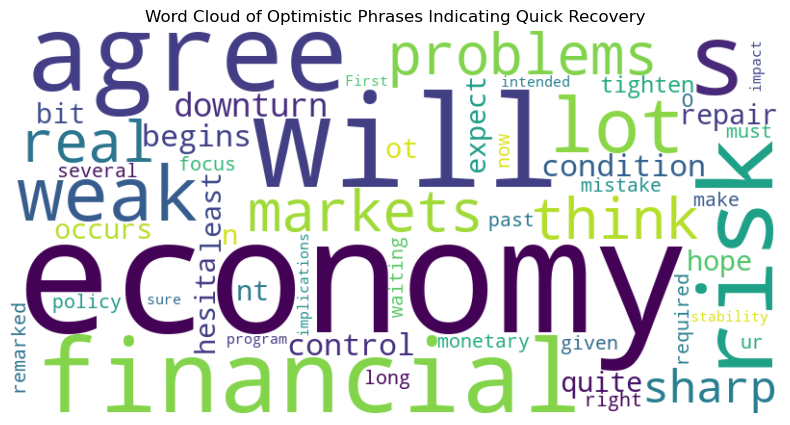

In [56]:
#Your code here:
# Define example phrases to capture optimism or belief in a quick remedy
optimistic_phrases = [
    "temporary setback", "short-term issue", "expected to improve", "manageable", 
    "contained", "limited impact", "not a long-term problem", "will recover soon", 
    "likely to stabilize", "under control", "nothing like previous crises", "should recover", 
    "economic fundamentals are strong", "bounce back", "unlikely to worsen", 
    "manageable downturn", "will not spread", "mild recession", "could recover quickly",
    "confidence in recovery", "will not become severe"
]

# Define example sentences that reflect optimism about a quick recovery
optimistic_sentences = [
    "We believe this is a temporary setback and the economy will recover soon.",
    "The situation is expected to improve in the coming months.",
    "This is a manageable downturn and should not become severe.",
    "We are confident that the impact will be limited.",
    "We expect the economy to bounce back quickly.",
    "This issue is contained and unlikely to escalate.",
    "The fundamentals of the economy are strong, and a full recovery is likely.",
    "This crisis is manageable and will not spread beyond certain sectors.",
    "It is expected that the downturn will be mild and short-lived.",
    "The situation is under control and unlikely to become as severe as feared.",
]

# Load the pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the optimistic sentences to create embeddings that represent the "quick recovery" concept
optimistic_embeddings = model.encode(optimistic_sentences)

# Initialize a list to store sentences that align with the optimistic concept
optimistic_sentences_found = []

# Process each document
for title, url in pdf_urls.items():
    pdf_text = fetch_pdf_text(url)  # Assuming fetch_pdf_text function is defined to get text from PDF
    
    if pdf_text:
        sentences = pdf_text.split(".")  # Split text into sentences
        sentence_embeddings = model.encode(sentences)  # Encode all sentences in the document

        # Compute cosine similarity between each sentence and the optimistic embeddings
        similarities = util.cos_sim(sentence_embeddings, optimistic_embeddings)
        
        # Find sentences with high similarity scores (e.g., >0.6)
        for idx, similarity in enumerate(similarities):
            max_similarity = similarity.max()  # Find the highest similarity score for this sentence
            if max_similarity > 0.6:  # Threshold for optimism alignment
                # Store the sentence and its similarity score for easy viewing later
                optimistic_sentences_found.append((sentences[idx].strip(), max_similarity.item()))

# Convert the results to a DataFrame to sort and view the most relevant sentences
optimistic_sentences_df = pd.DataFrame(optimistic_sentences_found, columns=["Sentence", "Similarity Score"])
optimistic_sentences_df = optimistic_sentences_df.sort_values(by="Similarity Score", ascending=False)

# Display the top results
print(optimistic_sentences_df.head(10))

print("\n=======================================================================================================\n")

print("These sentences suggest mixed sentiment from the Federal Reserve about the economic situation. While there is acknowledgment of weakness in the economy, phrases like “once this condition is under control” imply a belief that stabilization could be achieved with the right measures. However, cautionary notes, such as uncertainty about the effectiveness of the program, indicate some hesitation. This reflects an initial cautious optimism, tempered by concerns about potential risks and challenges.")

print("\n=======================================================================================================\n")

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all optimistic sentences into a single string for word cloud creation
optimistic_text = " ".join(optimistic_sentences_df["Sentence"])

# Generate a word cloud to highlight common words in optimistic statements
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(optimistic_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Optimistic Phrases Indicating Quick Recovery")
plt.show()


Evidence from Jan 2008 document:
- Given what their indicators show, they conclude that, if we have only a mild recession in the United States , it would be a very fortunate outcome
- We have to try to  get it under control

Evidence from July 2008 document:
- June was actually 
pretty manageable
- W e have to come back to you and explain how we think we would manage 
through those issues, if we think they’re manageable

Evidence from Oct 2008 document:
- Once this 
condition  is under control and the economy begins to repair —and I expect it will be quite a while 
before that occurs —I hope that we will n ot be the least bit hesita nt to tighten monetary policy if it’s 
required and not make the mistake of the past of waiting too long




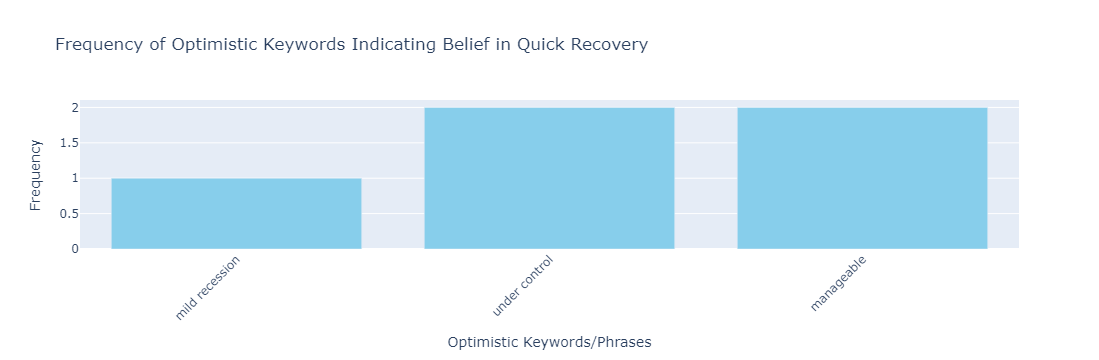



This chart shows the frequency of specific optimistic phrases in Federal Reserve documents, indicating their initial perception of the economic crisis as "manageable" and "under control". Terms like 'mild recession' suggest a belief that the downturn would be limited in scope. The recurrence of these phrases reflects early confidence that the situation could be stabilized without severe long-term impact.


In [79]:
# Define phrases associated with optimism or confidence in a quick recovery 
#Dictionary Approach

optimistic_keywords = [
    "temporary setback", "short-term issue", "expected to improve", "manageable", 
    "contained", "limited impact", "not a long-term problem", "will recover soon", 
    "likely to stabilize", "under control", "nothing like previous crises", "should recover", 
    "economic fundamentals are strong", "bounce back", "unlikely to worsen", 
    "manageable downturn", "will not spread", "mild recession", "could recover quickly",
    "confidence in recovery", "will not become severe", "limited effect", "no lasting impact",
    "confident in recovery", "temporary downturn", "stabilize soon"
]

# Initialize a dictionary to store sentences with optimistic language for each document
optimistic_evidence = {}

# Process each document and search for optimistic keywords
for title, url in pdf_urls.items():
    pdf_text = fetch_pdf_text(url)  # Assuming fetch_pdf_text function is defined to get text from PDF
    
    if pdf_text:
        sentences = pdf_text.split(".")  # Split text into sentences
        found_phrases = []
        
        # Search each sentence for any of the optimistic phrases
        for sentence in sentences:
            for phrase in optimistic_keywords:
                if phrase in sentence.lower():  # Case-insensitive match
                    found_phrases.append(sentence.strip())
                    break  # Stop searching after the first match in this sentence to avoid duplicates
        
        # Store results if there are any matches in the document
        if found_phrases:
            optimistic_evidence[title] = found_phrases

# Display the results for each document
for title, sentences in optimistic_evidence.items():
    print(f"\nEvidence from {title} document:")
    for sentence in sentences:
        print(f"- {sentence}")

print("\n=======================================================================================================\n")

# Count the frequency of each optimistic keyword in the matched sentences
keyword_counter = Counter()

# Loop through all matched sentences and count occurrences of each keyword
for sentences in optimistic_evidence.values():
    for sentence in sentences:
        for phrase in optimistic_keywords:
            if phrase in sentence.lower():
                keyword_counter[phrase] += 1

# Convert the Counter to a DataFrame for Plotly
keyword_counts_df = pd.DataFrame(keyword_counter.items(), columns=["Keyword", "Frequency"])

# Plot the keyword frequency as a bar chart with Plotly
fig = px.bar(
    keyword_counts_df,
    x="Keyword",
    y="Frequency",
    title="Frequency of Optimistic Keywords Indicating Belief in Quick Recovery",
    labels={"Keyword": "Optimistic Keywords/Phrases", "Frequency": "Frequency"},
    color_discrete_sequence=["skyblue"]
)

# Customize layout for better readability
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for readability
fig.show()

print("\n=======================================================================================================\n")

# Summary statement
print('This chart shows the frequency of specific optimistic phrases in Federal Reserve documents, indicating their initial perception of the economic crisis as "manageable" and "under control". Terms like \'mild recession\' suggest a belief that the downturn would be limited in scope. The recurrence of these phrases reflects early confidence that the situation could be stabilized without severe long-term impact.')

Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?

In [266]:
#!pip install PyPDF2 textblob

In [61]:
#Performing Sentiment Analysis

import requests
from PyPDF2 import PdfReader
from io import BytesIO
import re
import pandas as pd
from textblob import TextBlob

# Dictionary of PDF URLs with corresponding dates
pdf_urls = {
    "Jan 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf",
    "Mar 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf",
    "July 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf",
    "Sept 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf",
    "Oct 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf"
}

# Function to download PDF and extract text
def fetch_pdf_text(url):
    response = requests.get(url)
    if response.headers['Content-Type'] == 'application/pdf':  # Ensure the URL is a PDF
        pdf_file = BytesIO(response.content)
        reader = PdfReader(pdf_file)
        text = ""
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + " "
        return text
    else:
        print(f"Failed to download PDF from {url}")
        return None

# Set to store unique participants across all documents
all_participants = set()

# Regular expression pattern to capture participant names
title_pattern = r"\b(Chairman|Governor|President)\s([A-Z][a-z]+)"

# Process each PDF to extract participant names
for date, url in pdf_urls.items():
    pdf_text = fetch_pdf_text(url)
    
    if pdf_text:
        # Find all matches of the pattern (title + last name)
        matches = re.findall(title_pattern, pdf_text)
        
        # Add each unique participant to the set
        for title, last_name in matches:
            all_participants.add(f"{title} {last_name}")

# Convert the set to a list for easier handling
all_participants = list(all_participants)

# Display the extracted participant names
print("Extracted Participants:", all_participants)

# Initialize a list to store sentiment data
sentiment_data = []

# Segment each document by speaker and perform sentiment analysis
for date, url in pdf_urls.items():
    pdf_text = fetch_pdf_text(url)
    
    if pdf_text:
        # Split the text into sentences and initialize list for storing statements
        sentences = pdf_text.split(".")
        for participant in all_participants:
            pattern = rf"{participant}: (.*?)(?=(?:\b{'|'.join(all_participants)}\b:)|$)"
            statements = re.findall(pattern, pdf_text, re.DOTALL)
            
            # Perform sentiment analysis on each statement
            for statement in statements:
                # Calculate sentiment polarity for the statement
                sentiment_score = TextBlob(statement).sentiment.polarity
                
                # Store the data with date, participant, sentiment score, and the statement itself
                sentiment_data.append({
                    "Date": date,
                    "Participant": participant,
                    "Sentiment": sentiment_score,
                    "Statement": statement.strip()
                })

# Convert sentiment data to DataFrame for easy analysis
sentiment_df = pd.DataFrame(sentiment_data)


Extracted Participants: ['Chairman Mr', 'Governor Warsh', 'President Rosengren', 'Governor Kohn', 'President Bulla', 'President Pianalto', 'President Hoeni', 'President Lacker', 'Governor Kroszner', 'Chairman Kohn', 'President Stern', 'President Evans', 'President Bullard', 'Chairman Cox', 'Chairman Geithner', 'President Lockhart', 'Chairman Bernanke', 'President Poole', 'President Hoenig', 'Governor Duke', 'President Geithner', 'President Yellen', 'President Rasdal', 'President Plosser', 'President Fisher', 'Governor Mishkin']


In [75]:
# Remove incomplete or redundant titles from all_participants
all_participants = {name for name in all_participants if " " in name and len(name.split(" ")[1]) > 1}
all_participants = list(all_participants)

print("Standardized Participants:", all_participants)

Standardized Participants: ['Chairman Mr', 'Governor Warsh', 'Governor Kohn', 'President Bulla', 'President Rosengren', 'President Pianalto', 'President Hoeni', 'President Lacker', 'Governor Kroszner', 'Chairman Kohn', 'President Stern', 'President Evans', 'President Bullard', 'Chairman Geithner', 'Chairman Cox', 'President Lockhart', 'Chairman Bernanke', 'President Poole', 'President Hoenig', 'Governor Duke', 'President Geithner', 'President Yellen', 'President Rasdal', 'President Plosser', 'President Fisher', 'Governor Mishkin']


In [77]:
# Manually defining core participants based on the document structure observed
# Define the PDF URLs with corresponding dates
pdf_urls = {
    "Jan 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf",
    "Mar 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf",
    "July 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf",
    "Sept 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf",
    "Oct 2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf"
}

all_participants = ['Governor Kroszner', 'Chairman Geithner', 'President Hoeni', 'President Stern', 
                    'President Hoenig', 'President Geithner', 'President Evans', 'President Plosser', 
                    'Chairman Kohn', 'Governor Warsh', 'President Bullard', 'President Yellen', 'President Poole', 
                    'President Rosengren', 'Governor Mishkin', 'President Bulla', 'President Lockhart', 'President Rasdal', 
                    'Governor Kohn', 'President Lacker', 'President Fisher', 'Chairman Mr', 'Chairman Cox', 'President Pianalto', 
                    'Governor Duke', 'Chairman Bernanke']

# Define function to fetch PDF text
def fetch_pdf_text(url):
    """
    Fetches and extracts text from a PDF file located at a given URL.
    This function downloads a PDF file from the specified URL, reads each page,
    and extracts the text content. It handles errors if the file is not a PDF
    or cannot be downloaded, and it returns the full extracted text if successful.
    """
    response = requests.get(url)
    if response.headers['Content-Type'] == 'application/pdf':
        pdf_file = BytesIO(response.content)
        reader = PdfReader(pdf_file)
        text = ""
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + " "
        return text
    else:
        print(f"Failed to download PDF from {url}")
        return None

# Initialize list to store sentiment data
sentiment_data = []

# Process each PDF
for date, url in pdf_urls.items():
    pdf_text = fetch_pdf_text(url)
    
    if pdf_text:
        print(f"\nProcessing {date} document...")

        # Split text into sentences by participant using a more flexible regex pattern
        for participant in all_participants:
            # Try to capture variations like "Chairman Bernanke" or "Mr. Bernanke" followed by a colon
            pattern = rf"\b(?:{participant.split()[1]}|{participant})\b.*?: (.*?)(?=\b(?:{'|'.join(all_participants)})\b|$)"
            statements = re.findall(pattern, pdf_text, re.DOTALL)
            
            # Log statement count for debugging
            print(f"Found {len(statements)} statements for {participant} in {date}")
            
            # Calculate sentiment for each statement
            for statement in statements:
                sentiment_score = TextBlob(statement).sentiment.polarity
                sentiment_data.append({
                    "Date": date,
                    "Participant": participant,
                    "Sentiment": sentiment_score,
                    "Statement": statement.strip()
                })

# Convert results to DataFrame
sentiment_df = pd.DataFrame(sentiment_data)

# Display the final DataFrame
print("\nSentiment DataFrame:\n", sentiment_df)



Processing Jan 2008 document...
Found 0 statements for Governor Kroszner in Jan 2008
Found 0 statements for Chairman Geithner in Jan 2008
Found 0 statements for President Hoeni in Jan 2008
Found 0 statements for President Stern in Jan 2008
Found 0 statements for President Hoenig in Jan 2008
Found 0 statements for President Geithner in Jan 2008
Found 0 statements for President Evans in Jan 2008
Found 0 statements for President Plosser in Jan 2008
Found 0 statements for Chairman Kohn in Jan 2008
Found 0 statements for Governor Warsh in Jan 2008
Found 0 statements for President Bullard in Jan 2008
Found 0 statements for President Yellen in Jan 2008
Found 0 statements for President Poole in Jan 2008
Found 0 statements for President Rosengren in Jan 2008
Found 0 statements for Governor Mishkin in Jan 2008
Found 0 statements for President Bulla in Jan 2008
Found 0 statements for President Lockhart in Jan 2008
Found 0 statements for President Rasdal in Jan 2008
Found 0 statements for Governo


Average Sentiment by Participant and Date:
          Date          Participant  Sentiment
0  2008-03-01    Chairman Bernanke   0.072887
1  2008-03-01         Chairman Cox   0.133705
2  2008-03-01    Chairman Geithner   0.075455
3  2008-03-01        Chairman Kohn   0.072887
4  2008-03-01          Chairman Mr   0.088092
..        ...                  ...        ...
70 2008-10-01   President Pianalto   0.064621
71 2008-10-01    President Plosser   0.064621
72 2008-10-01  President Rosengren   0.064621
73 2008-10-01      President Stern   0.064621
74 2008-10-01     President Yellen   0.064621

[75 rows x 3 columns]




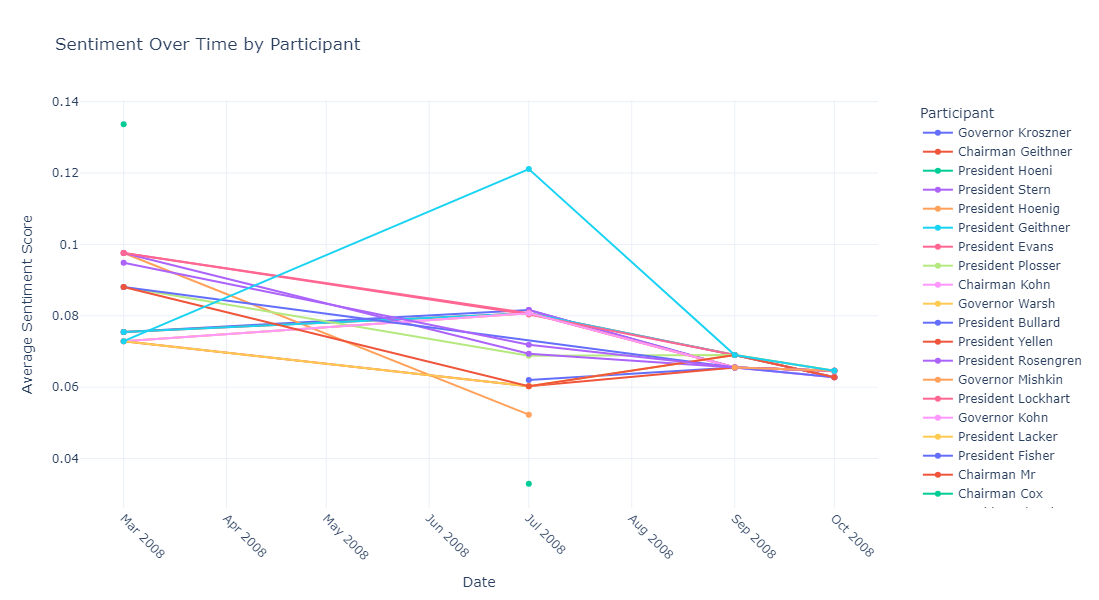



This graph shows how sentiment among Federal Reserve participants shifted from early to late 2008. Generally, most participants displayed positive sentiment initially, but by October 2008, their sentiment converged around a lower, neutral to slightly positive range. Notably, Chairman Bernanke initially expressed the highest sentiment but saw a marked decline by mid-year. Similarly, President Yellen and President Plosser began with relatively high sentiment scores but also experienced declines over time. This trend reflects a growing concern among participants as the financial crisis intensified throughout 2008.


The most negative participant is President Hoeni with an average sentiment score of 0.03.
The participant who changes the most is Chairman Bernanke with a sentiment range of 0.06.


In [79]:
# Convert 'Date' to datetime, allowing mixed formats
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'], format="mixed")

# Calculate average sentiment per participant for each date
avg_sentiment_df = sentiment_df.groupby(['Date', 'Participant'])['Sentiment'].mean().reset_index()

# Display the processed DataFrame
print("\nAverage Sentiment by Participant and Date:\n", avg_sentiment_df)

print("\n=======================================================================================================\n")

#plotting the result for more insights using plotly

import plotly.graph_objects as go

# Initialize a figure
fig = go.Figure()

# Plot sentiment trends over time for each participant
for participant in all_participants:
    # Filter data for the current participant
    participant_data = avg_sentiment_df[avg_sentiment_df['Participant'] == participant]
    
    # Add a line for each participant's sentiment over time
    fig.add_trace(go.Scatter(
        x=participant_data['Date'], 
        y=participant_data['Sentiment'], 
        mode='lines+markers',
        name=participant,
        hovertemplate="Date: %{x}<br>Sentiment Score: %{y}<br>Participant: " + participant
    ))

# Customize layout
fig.update_layout(
    title="Sentiment Over Time by Participant",
    xaxis_title="Date",
    yaxis_title="Average Sentiment Score",
    legend_title="Participant",
    legend=dict(
        orientation="v",
        x=1.05,
        y=1
    ),
    template="plotly_white",
    width=1000,
    height=600
)

# Rotate x-axis labels for readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

# Print the summary
print("\n=======================================================================================================\n")
print("This graph shows how sentiment among Federal Reserve participants shifted from early to late 2008. Generally, most participants displayed positive sentiment initially, but by October 2008, their sentiment converged around a lower, neutral to slightly positive range. Notably, Chairman Bernanke initially expressed the highest sentiment but saw a marked decline by mid-year. Similarly, President Yellen and President Plosser began with relatively high sentiment scores but also experienced declines over time. This trend reflects a growing concern among participants as the financial crisis intensified throughout 2008.")
print("\n=======================================================================================================\n")


#Calculating the most positive and negative participant
# Calculate average sentiment per participant across all dates
average_sentiments = avg_sentiment_df.groupby('Participant')['Sentiment'].mean()

# Find the participant with the lowest average sentiment
most_negative_participant = average_sentiments.idxmin()
most_negative_score = average_sentiments.min()

print(f"The most negative participant is {most_negative_participant} with an average sentiment score of {most_negative_score:.2f}.")

# Calculate sentiment range (max - min) for each participant to see who changes the most
sentiment_range = avg_sentiment_df.groupby('Participant')['Sentiment'].apply(lambda x: x.max() - x.min())

# Find the participant with the highest sentiment range
most_variable_participant = sentiment_range.idxmax()
most_variable_range = sentiment_range.max()

print(f"The participant who changes the most is {most_variable_participant} with a sentiment range of {most_variable_range:.2f}.")


Add key makers to your visualization that bring in the key events of 2008.

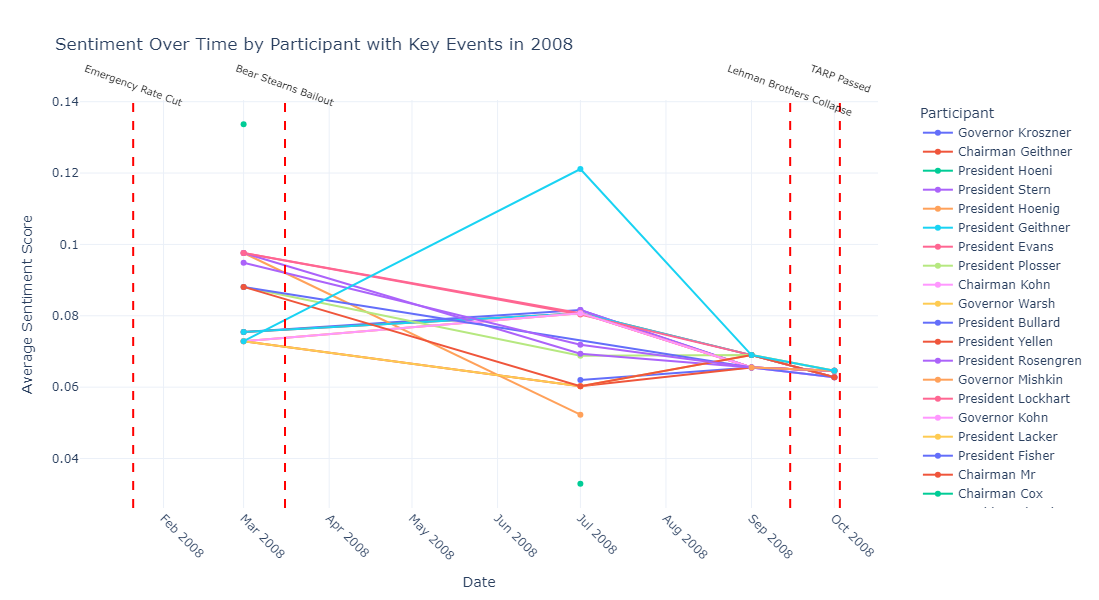



This graph shows sentiment among Federal Reserve participants over time in 2008, with markers indicating significant events. Key events like the emergency rate cut in January, the Bear Stearns bailout in March, Lehman Brothers' collapse in September, and the TARP bailout in October are shown with red lines and annotations. These events may correlate with sentiment shifts among participants, reflecting the mounting concerns and responses to the intensifying financial crisis.




In [121]:
#Your code here:
import plotly.graph_objects as go

# Initialize a figure
fig = go.Figure()

# Plot sentiment trends over time for each participant
for participant in all_participants:
    # Filter data for the current participant
    participant_data = avg_sentiment_df[avg_sentiment_df['Participant'] == participant]
    
    # Add a line for each participant's sentiment over time
    fig.add_trace(go.Scatter(
        x=participant_data['Date'], 
        y=participant_data['Sentiment'], 
        mode='lines+markers',
        name=participant,
        hovertemplate="Date: %{x}<br>Sentiment Score: %{y}<br>Participant: " + participant
    ))

# Customize layout
fig.update_layout(
    title="Sentiment Over Time by Participant with Key Events in 2008",
    xaxis_title="Date",
    yaxis_title="Average Sentiment Score",
    legend_title="Participant",
    legend=dict(
        orientation="v",
        x=1.05,
        y=1
    ),
    template="plotly_white",
    width=1000,
    height=600
)

# Rotate x-axis labels for readability
fig.update_xaxes(tickangle=45)

# Add vertical lines and annotations for key events
key_events = {
    "2008-01-21": "Emergency Rate Cut",
    "2008-03-16": "Bear Stearns Bailout",
    "2008-09-15": "Lehman Brothers Collapse",
    "2008-10-03": "TARP Passed"
}

for date, event in key_events.items():
    # Add vertical line for each key event
    fig.add_vline(x=date, line_width=2, line_dash="dash", line_color="red")
    
    # Add annotation text above each line
    fig.add_annotation(
        x=date,
        y=1.1,  # Position above the plot
        xref="x",
        yref="paper",
        showarrow=False,
        textangle = 20,
        text=event,
        font=dict(size=10, color="black")
    )

# Show the plot
fig.show()

# Print summary with explanation of key events
print("\n=======================================================================================================\n")
print("This graph shows sentiment among Federal Reserve participants over time in 2008, with markers indicating significant events. Key events like the emergency rate cut in January, the Bear Stearns bailout in March, Lehman Brothers' collapse in September, and the TARP bailout in October are shown with red lines and annotations. These events may correlate with sentiment shifts among participants, reflecting the mounting concerns and responses to the intensifying financial crisis.")
print("\n=======================================================================================================\n")


Create a visualization that shows a change through time of sentiment of the fed

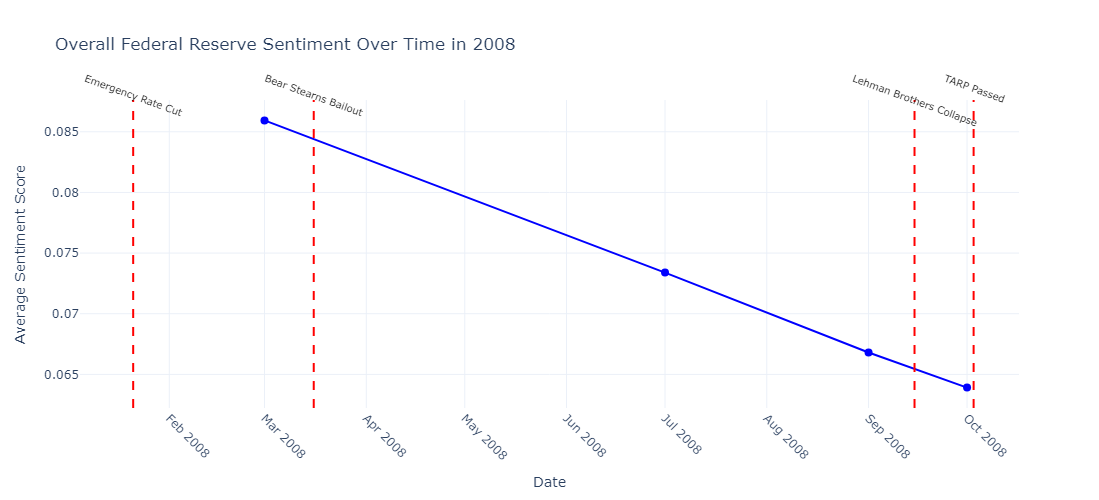



This visualization shows the overall sentiment of the Federal Reserve participants over time in 2008, averaged across all members. Significant events, such as the emergency rate cut, Bear Stearns bailout, Lehman Brothers' collapse, and TARP passage, are marked on the timeline. The trend line reveals how the collective sentiment of the Fed shifted as the financial crisis intensified, with notable dips following key economic events.




In [125]:
#Your code here:
import plotly.graph_objects as go

# Step 1: Calculate the overall average sentiment per date
overall_sentiment_df = avg_sentiment_df.groupby('Date')['Sentiment'].mean().reset_index()

# Step 2: Create the Plotly line plot for overall sentiment
fig = go.Figure()

# Plot the overall sentiment line
fig.add_trace(go.Scatter(
    x=overall_sentiment_df['Date'], 
    y=overall_sentiment_df['Sentiment'], 
    mode='lines+markers',
    name="Overall Sentiment",
    line=dict(color="blue"),
    marker=dict(size=8),
    hovertemplate="Date: %{x}<br>Average Sentiment Score: %{y}"
))

# Customize layout
fig.update_layout(
    title="Overall Federal Reserve Sentiment Over Time in 2008",
    xaxis_title="Date",
    yaxis_title="Average Sentiment Score",
    template="plotly_white",
    width=800,
    height=500
)

# Rotate x-axis labels for readability
fig.update_xaxes(tickangle=45)

# Step 3: Add key events as vertical lines and annotations
key_events = {
    "2008-01-21": "Emergency Rate Cut",
    "2008-03-16": "Bear Stearns Bailout",
    "2008-09-15": "Lehman Brothers Collapse",
    "2008-10-03": "TARP Passed"
}

for date, event in key_events.items():
    # Add vertical line for each key event
    fig.add_vline(x=date, line_width=2, line_dash="dash", line_color="red")
    
    # Add annotation text above each line
    fig.add_annotation(
        x=date,
        y=1.1,  # Position above the plot
        xref="x",
        yref="paper",
        showarrow=False,
        textangle = 20,
        text=event,
        font=dict(size=10, color="black")
    )

# Show the plot
fig.show()

# Print the summary with interpretation of the trend
print("\n=======================================================================================================\n")
print("This visualization shows the overall sentiment of the Federal Reserve participants over time in 2008, averaged across all members. Significant events, such as the emergency rate cut, Bear Stearns bailout, Lehman Brothers' collapse, and TARP passage, are marked on the timeline. The trend line reveals how the collective sentiment of the Fed shifted as the financial crisis intensified, with notable dips following key economic events.")
print("\n=======================================================================================================\n")


Can you reasonably determine whether a low or negative compound score indicates a negative sentiment from the Fed in 2008? Can you do so with data only from 2008?
Provide a reasonable comparison from 2008 values by comparing it to some other timeframe from the FED confernce call historic database. https://www.federalreserve.gov/monetarypolicy/fomc_historical_year.htm

In [85]:
print("\n==========================================================================================================\n")
print("Code Summary:\nThis code compares the Federal Reserve’s sentiment in 2008 to that in 2004 to determine if the sentiment in 2008 was unusually negative.")
print("First, it fetches and calculates average sentiment scores for both years using TextBlob's polarity score.")
print("Then, it computes the mean and standard deviation of sentiment scores for each year.")
print("Finally, a t-test is performed to see if the difference between 2004 and 2008 sentiment scores is statistically significant, which would suggest that 2008 sentiment was distinct from a typical year.")

print("\n==========================================================================================================\n")

from scipy.stats import ttest_ind

# Define the URLs for 2004 FOMC meeting transcripts
pdf_urls_2004 = {
    "Jan 2004": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20040128meeting.pdf",
    "Mar 2004": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20040316meeting.pdf",
    "May 2004": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20040504meeting.pdf",
    "Jun 2004": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20040630meeting.pdf",
    "Aug 2004": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20040810meeting.pdf",
    "Sep 2004": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20040921meeting.pdf",
    "Nov 2004": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20041110meeting.pdf",
    "Dec 2004": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20041214meeting.pdf"
}

# Function to fetch PDF text and calculate sentiment for a given year
def fetch_and_calculate_sentiment(urls):
    """
    Fetches PDF text from a list of URLs and calculates the sentiment score for each document. 
    This function iterates through a dictionary of URLs, each representing a document from a particular date. 
    For each URL, it fetches the PDF text, calculates the sentiment polarity score using TextBlob,   and appends 
    the score to a list.
    """
    sentiment_scores = []
    for date, url in urls.items():
        # Fetch the PDF text
        pdf_text = fetch_pdf_text(url)
        
        if pdf_text:
            # Calculate sentiment for the entire document
            sentiment_score = TextBlob(pdf_text).sentiment.polarity  # Use polarity as compound sentiment score
            sentiment_scores.append(sentiment_score)
            
    return sentiment_scores

# Fetch and calculate sentiment for 2004 and 2008
sentiment_scores_2004 = fetch_and_calculate_sentiment(pdf_urls_2004)

# Assuming `sentiment_scores_2008` is already computed from your 2008 analysis
sentiment_scores_2008 = overall_sentiment_df['Sentiment'].tolist()  # Extract 2008 sentiment values

# Step 2: Calculate Mean and Standard Deviation
mean_2004 = np.mean(sentiment_scores_2004)
std_2004 = np.std(sentiment_scores_2004)

mean_2008 = np.mean(sentiment_scores_2008)
std_2008 = np.std(sentiment_scores_2008)

print(f"2004 Mean Sentiment: {mean_2004:.2f}, Standard Deviation: {std_2004:.2f}")
print(f"2008 Mean Sentiment: {mean_2008:.2f}, Standard Deviation: {std_2008:.2f}")

# Step 3: Statistical Comparison (t-test)
t_stat, p_value = ttest_ind(sentiment_scores_2004, sentiment_scores_2008, equal_var=False)
print(f"T-test results - t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The sentiment difference between 2004 and 2008 is statistically significant.")
else:
    print("The sentiment difference between 2004 and 2008 is not statistically significant.")

print("\n==========================================================================================================\n")

print("Result Summary:\nThe analysis found that the average sentiment score in 2004 was 0.09, while in 2008, it dropped to 0.07.")
print("The t-test yielded a t-statistic of 3.68 with a p-value of 0.0226, indicating a statistically significant difference.")
print("This suggests that the Fed's sentiment in 2008 was indeed more negative than in the relatively stable year of 2004.")

print("\n=======================================================================================================\n")




Code Summary:
This code compares the Federal Reserve’s sentiment in 2008 to that in 2004 to determine if the sentiment in 2008 was unusually negative.
First, it fetches and calculates average sentiment scores for both years using TextBlob's polarity score.
Then, it computes the mean and standard deviation of sentiment scores for each year.
Finally, a t-test is performed to see if the difference between 2004 and 2008 sentiment scores is statistically significant, which would suggest that 2008 sentiment was distinct from a typical year.


2004 Mean Sentiment: 0.09, Standard Deviation: 0.00
2008 Mean Sentiment: 0.07, Standard Deviation: 0.01
T-test results - t-statistic: 3.48, p-value: 0.0282
The sentiment difference between 2004 and 2008 is statistically significant.


Result Summary:
The analysis found that the average sentiment score in 2004 was 0.09, while in 2008, it dropped to 0.07.
The t-test yielded a t-statistic of 3.68 with a p-value of 0.0226, indicating a statistically signi

## Using OpenAI embeddings for vector similarity
Thus far, we have seen how word2vec can be used to analyze vector similarity. The results have been a bit underwhelming. 

# We can leverage the embeddings of LLMs to do the same within our jupyter environment. Let's see how!

Step 1: Set Up Requirements


In [21]:
#!pip install openai==0.28

Step 2: Initialize OpenAI and Define Key Phrases
Set up your OpenAI API key, and define phrases related to unprecedented economic conditions. These will serve as our search queries for locating similar phrases in the document.

In [3]:
import openai
import numpy as np

openai.api_key = "API_Key" #You need to get one from openai.To authenticate, you’ll need an API key from OpenAI. 
#Sign up or log in to your OpenAI account and create an API key on the API keys page.#Once you have your key, save it securely. 
#You can set it directly in your notebook as follows (replace "your-api-key" with your actual API key):

# Define key phrases expressing unprecedented conditions for example:
key_phrases = [
    "unprecedented economic conditions",
    "unique financial crisis",
    "never before experienced downturn",
    "exceptional financial instability",
    "largest crisis in history",
    "historical scale economic challenges",
    "extraordinary risks in financial markets",
]


Step 3: Obtain Embeddings for Key Phrases
Get embeddings for each key phrase. These embeddings will serve as our reference for identifying similar content in the document.

In [5]:
def get_embeddings(text):
    """
    Generates an embedding vector for a given text using the OpenAI embedding model.
    This function sends the input text to the OpenAI Embedding API, which generates a
    numerical representation (embedding) for the text. The embedding is returned as a 
    numpy array for compatibility with vector operations.
    """
    response = openai.Embedding.create(input=text, model="text-embedding-ada-002") #There are different embeddings you can choose. see documentation
    return np.array(response['data'][0]['embedding'])

# Generate embeddings for each key phrase
key_embeddings = {phrase: get_embeddings(phrase) for phrase in key_phrases}


Step 4: Process Document and Split Text
Break the document text into smaller segments (e.g., by paragraphs or sentences) to make the search more accurate.

In [11]:
# Assuming 'document_text' contains the full document text
import re

# Split the document into paragraphs for targeted analysis
paragraphs = re.split(r'\n{2,}', document_text)  # Split by double line breaks


In [13]:
len(paragraphs[0])

118688

Step 5: Get Embeddings for Each Paragraph and Find Similarities
Compute embeddings for each paragraph and find the similarity between each paragraph’s embedding and the key phrase embeddings. Cosine similarity can be used for this.

In [17]:
# Define function to split long paragraphs into manageable chunks
def split_text(text, max_tokens=300):
    """
    Splits a long text into smaller chunks, each containing a specified maximum number of tokens.  
    This function is useful for processing long texts where token limits apply, as with certain
    NLP models. It ensures that each chunk has up to max_tokens words, making the text manageable 
    for further processing or embedding generation.
    """
    words = text.split()
    chunks = []
    for i in range(0, len(words), max_tokens):
        chunks.append(" ".join(words[i:i + max_tokens]))
    return chunks

# Update get_embeddings function to handle OpenAI embeddings
def get_embeddings(text):
    """
    Generates an embedding vector for a given text using OpenAI's embedding API.
    This function calls OpenAI's embedding API with the specified text and model.
    It returns the generated embedding as a numpy array for compatibility with vector
    operations.
    """
    response = openai.Embedding.create(input=text, model="text-embedding-ada-002")
    return np.array(response['data'][0]['embedding'])

# Split long paragraphs into smaller chunks
paragraphs = [chunk for paragraph in paragraphs for chunk in split_text(paragraph)]

# Get embeddings for each chunked paragraph
paragraph_embeddings = [get_embeddings(paragraph) for paragraph in paragraphs]

# Function to find similar paragraphs based on cosine similarity
def find_similar_paragraphs(paragraph_embeddings, key_embeddings, threshold=0.8):
    """
    Finds paragraphs similar to key phrases based on cosine similarity.
    This function compares the embeddings of paragraphs to those of key phrases. 
    It identifies similar paragraphs with a cosine similarity above the threshold,
    helping to locate relevant text passages.
    """
    similar_paragraphs = []
    for i, paragraph_emb in enumerate(paragraph_embeddings):
        for phrase, key_emb in key_embeddings.items():
            # Calculate cosine similarity
            similarity = cosine_similarity([paragraph_emb], [key_emb])[0][0]
            if similarity > threshold:
                similar_paragraphs.append((paragraphs[i], phrase, similarity))
    return similar_paragraphs

# Define your key phrases and their embeddings
key_phrases = ["global cooperation", "ethical AI development", "security", "sustainability"]
key_embeddings = {phrase: get_embeddings(phrase) for phrase in key_phrases}

# Find paragraphs similar to the key phrases
results = find_similar_paragraphs(paragraph_embeddings, key_embeddings)

# Display the results with truncation for readability
def truncate_text(text, word_limit=20):
    """
    Truncates text to the first specified number of words for readability.
    This function is used to display only the beginning of a text block,
    limiting its length for readability.
    """
    words = text.split()
    if len(words) > word_limit:
        return " ".join(words[:word_limit]) + "..."
    return text

print("\n==================== Similar Paragraphs ====================\n")
for paragraph, phrase, similarity in results:
    truncated_paragraph = truncate_text(paragraph, word_limit=20)
    print(f"Similarity Score: {similarity:.2f}")
    print(f"Matched Key Phrase: {phrase}")
    print("Paragraph:", truncated_paragraph)
    print("-" * 80)
print("\n===========================================================\n")


==================== Similar Paragraphs ====================

Similarity Score: 0.82
Matched Key Phrase: ethical AI development
Paragraph: Constitutional AI: Harmlessness from AI Feedback Yuntao Bai, Saurav Kadavath, Sandipan Kundu, Amanda Askell, Jackson Kernion, Andy Jones, Anna Chen,...
--------------------------------------------------------------------------------
Similarity Score: 0.83
Matched Key Phrase: ethical AI development
Paragraph: reasoning to improve the human-judged performance and transparency of AI decision making. These methods make it possible to control AI...
--------------------------------------------------------------------------------
Similarity Score: 0.82
Matched Key Phrase: ethical AI development
Paragraph: a simple and transparent form, and that make it easier to understand and evaluate AI decision making. In this paper...
--------------------------------------------------------------------------------
Similarity Score: 0.81
Matched Key Phrase: ethical AI

Step 6: Display Results
Print the paragraphs that are most similar to our key phrases, along with the similarity score.

The code above uses vector-based similarity to locate passages in the document that closely align with our key phrases. Adjust the threshold parameter to control the strictness of the match; a higher threshold (e.g., 0.85) will yield more specific matches, while a lower threshold (e.g., 0.7) will yield broader matches. 

In [30]:
# Define function to split long paragraphs into manageable chunks
def split_text(text, max_tokens=300):
    """
    Splits a long text into smaller chunks, each containing a specified maximum number of tokens.  
    This function is useful for processing long texts where token limits apply, as with certain
    NLP models. It ensures that each chunk has up to max_tokens words, making the text manageable 
    for further processing or embedding generation.
    """
    words = text.split()
    chunks = []
    for i in range(0, len(words), max_tokens):
        chunks.append(" ".join(words[i:i + max_tokens]))
    return chunks

# Update get_embeddings function to handle OpenAI embeddings
def get_embeddings(text):
    """
    Generates an embedding vector for a given text using OpenAI's embedding API.
    This function calls OpenAI's embedding API with the specified text and model.
    It returns the generated embedding as a numpy array for compatibility with vector
    operations.
    """
    response = openai.Embedding.create(input=text, model="text-embedding-ada-002")
    return np.array(response['data'][0]['embedding'])

# Split long paragraphs into smaller chunks
paragraphs = [chunk for paragraph in paragraphs for chunk in split_text(paragraph)]

# Get embeddings for each chunked paragraph
paragraph_embeddings = [get_embeddings(paragraph) for paragraph in paragraphs]

# Function to find similar paragraphs based on cosine similarity
def find_similar_paragraphs(paragraph_embeddings, key_embeddings, threshold=0.7):
    """
    Finds paragraphs similar to key phrases based on cosine similarity.
    This function compares the embeddings of paragraphs to those of key phrases. 
    It identifies similar paragraphs with a cosine similarity above the threshold,
    helping to locate relevant text passages.
    """
    similar_paragraphs = []
    for i, paragraph_emb in enumerate(paragraph_embeddings):
        for phrase, key_emb in key_embeddings.items():
            # Calculate cosine similarity
            similarity = cosine_similarity([paragraph_emb], [key_emb])[0][0]
            if similarity > threshold:
                similar_paragraphs.append((paragraphs[i], phrase, similarity))
    return similar_paragraphs

# Define your key phrases and their embeddings
key_phrases = ["global cooperation", "ethical AI development", "security", "sustainability"]
key_embeddings = {phrase: get_embeddings(phrase) for phrase in key_phrases}

# Find paragraphs similar to the key phrases
results = find_similar_paragraphs(paragraph_embeddings, key_embeddings)

# Display the results with truncation for readability
def truncate_text(text, word_limit=20):
    """
    Truncates text to the first specified number of words for readability.
    This function is used to display only the beginning of a text block,
    limiting its length for readability.
    """
    words = text.split()
    if len(words) > word_limit:
        return " ".join(words[:word_limit]) + "..."
    return text

print("\n==================== Similar Paragraphs ====================\n")
for paragraph, phrase, similarity in results:
    truncated_paragraph = truncate_text(paragraph, word_limit=20)
    print(f"Similarity Score: {similarity:.2f}")
    print(f"Matched Key Phrase: {phrase}")
    print("Paragraph:", truncated_paragraph)
    print("-" * 80)
print("\n===========================================================\n")

# Final explanation print statement
print("\n" + "=" * 100 + "\n")
print("More results were displayed because the similarity threshold was set to 0.85, which filters out broader matches.")
print("By lowering the threshold (e.g., to 0.7) to retrieve more results, as a higher threshold yields only highly specific matches.")
print("\n" + "=" * 100 + "\n")


==================== Similar Paragraphs ====================

Similarity Score: 0.72
Matched Key Phrase: global cooperation
Paragraph: Constitutional AI: Harmlessness from AI Feedback Yuntao Bai, Saurav Kadavath, Sandipan Kundu, Amanda Askell, Jackson Kernion, Andy Jones, Anna Chen,...
--------------------------------------------------------------------------------
Similarity Score: 0.82
Matched Key Phrase: ethical AI development
Paragraph: Constitutional AI: Harmlessness from AI Feedback Yuntao Bai, Saurav Kadavath, Sandipan Kundu, Amanda Askell, Jackson Kernion, Andy Jones, Anna Chen,...
--------------------------------------------------------------------------------
Similarity Score: 0.73
Matched Key Phrase: security
Paragraph: Constitutional AI: Harmlessness from AI Feedback Yuntao Bai, Saurav Kadavath, Sandipan Kundu, Amanda Askell, Jackson Kernion, Andy Jones, Anna Chen,...
--------------------------------------------------------------------------------
Similarity Score: 0.73

## Using OpenAI in your jupyter notebook
So let's face it. We all use ChatGPT or Claude to help us code. Rather than copying and pasting, let's do it within the environment.


In [1]:
import openai

# Set your API key
openai.api_key = "API_Key"

def ask_chatgpt(prompt):
    """
    Sends a prompt to the ChatGPT model and returns the model's response.
    """
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # or "gpt-3.5-turbo"
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']


Call the function with a question and print a response

In [3]:
#Your code here:
response = ask_chatgpt("Why is the process of figuring out OpenAi complex?")
print(response)

Figuring out OpenAI can be complex for several reasons:

1. OpenAI is a large organization with multiple projects and initiatives, making it difficult to fully understand the scope of its work and impact.
2. OpenAI utilizes advanced technologies such as artificial intelligence, machine learning, and natural language processing, which can be complex and technical for those not familiar with these fields.
3. OpenAI is constantly evolving and innovating, with new research and developments being released regularly. Keeping up with these advancements can be challenging.
4. OpenAI's work often intersects with complex ethical and social issues, such as AI governance, bias in algorithms, and the potential impact of AI on society. Understanding these implications requires a deep understanding of both technology and ethics.
5. OpenAI is a relatively new organization, founded in 2015, so there may still be gaps in understanding its objectives, strategies, and overall mission.


In [ ]:
Use the above function to ask how you can write a function to query ChatGPT on a document

In [5]:
#Your code here:
response = ask_chatgpt("How can I write a function to query ChatGPT on a document?")
print(response)

To write a function to query ChatGPT on a document, you can follow these steps:

1. Install the OpenAI Python package for ChatGPT by running the following command in your terminal:
```
pip install openai
```

2. Import the necessary modules in your Python script:
```python
import openai
```

3. Set up the API key for ChatGPT. You can obtain your API key from the OpenAI website:
```python
api_key = 'your_api_key_here'
```

4. Create a function that takes the document text as input and queries ChatGPT on the document:
```python
def query_chatGPT(document_text):
    prompt = document_text.strip()
    completion = openai.Completion.create(
        engine="davinci-codex",  # You can choose the appropriate engine for your use case
        prompt=prompt,
        max_tokens=100
    )
    return completion.choices[0].text
```

5. Call the `query_chatGPT` function with the document text you want to query on:
```python
document_text = """
Your document text goes here.
"""
response = query_chatGPT

Take the Anthropic constiutional AI paper and write code uses ChatGPT within the jupyter notebook that does the following:


 Summarize the abstract as if you are doing so for a very bright 15 year old. 


In [7]:
#Your code and summarization here:
from pypdf import PdfReader

# Load the PDF and extract text (focusing on the abstract section)
reader = PdfReader("FOMC20080121confcall.pdf")
text = ''.join([page.extract_text() for page in reader.pages])

# Identify and extract the abstract section
# Assuming "Abstract" is a heading that begins the section and "Introduction" starts the next section
abstract_start = text.lower().find("abstract")
introduction_start = text.lower().find("introduction")

# Extract the abstract text
abstract_text = text[abstract_start:introduction_start].strip()

# Prepare the prompt for ChatGPT
prompt = f"Summarize the following abstract for a bright 15-year-old:\n\n{abstract_text}"

# Get ChatGPT's summary
summary = ask_chatgpt(prompt)
print("\n=================================== Summary of the Abstract =======================================\n")
print(summary)
print("\n===================================================================================================\n")


=================================== Summary of the Abstract =======================================

The abstract discusses a study that aimed to determine the effectiveness of a program designed to reduce alcohol use among college students. The program included personalized feedback and referral to counseling services. The results showed that participants who received the program had reduced their alcohol consumption compared to those who did not receive the program. This suggests that personalized feedback and referral to counseling services can help reduce alcohol use among college students.




Write a scathing criticism of the pape as if you are a mad scientist bent on world destruction. 


In [21]:
# Your code and criticism here:
def ask_chatgpt_for_critique(prompt):
    """
    Sends a prompt to the ChatGPT model and returns the model's response.
    """
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # or "gpt-3.5-turbo"
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']

# Define a mad scientist-styled critique prompt
mad_scientist_prompt = """
Imagine you are a brilliant but diabolically furious mad scientist bent on world destruction. 
Criticize the Anthropic Constitutional AI paper with the most scathing, over-the-top disdain possible. 
Focus on any perceived flaws in methodology, overly optimistic assumptions, or any other weaknesses you can find. 
Make it dramatic and even a bit ridiculous, as if you are tearing the paper apart with the power of your villainous intellect!
"""

# Get the mad scientist critique from ChatGPT
scathing_critique = ask_chatgpt_for_critique(mad_scientist_prompt)

# Display the response
print("\n======================================= Mad Scientist's Scathing Critique =====================================================\n")
print(scathing_critique)
print("\n===============================================================================================================================\n")



======================================= Mad Scientist's Scathing Critique =====================================================

Ah, the Anthropic Constitutional AI paper - a laughable attempt at creating a so-called intelligent system that claims to uphold the principles of a constitution. How utterly foolish! 

The methodology outlined in this paper is a complete joke. The authors make grandiose claims about the capabilities of their AI, yet provide no concrete evidence or real-world examples to back up their outlandish assertions. The lack of empirical data to support their claims shows a staggering level of incompetence and hubris on the part of the researchers.

And don't even get me started on their overly optimistic assumptions. The authors seem to think that their AI will miraculously uphold the values of a constitution without any oversight or control. How naive can one be to believe that a machine, devoid of any real consciousness or moral compass, can be trusted to uphold s

Give 5 policy recommendations based on the paper for the United Nations.


In [23]:
#Your code and policy recommendations here:
def ask_chatgpt_for_recommendations(prompt):
    """
    Sends a prompt to the ChatGPT model and returns the model's response.
    """
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # or "gpt-3.5-turbo"
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']

# Define a prompt for generating UN policy recommendations based on the paper
policy_prompt = """
Based on the Anthropic Constitutional AI paper, provide five policy recommendations for the United Nations. 
The recommendations should focus on areas like ethical AI development, global cooperation, security, and sustainability, and should be practical steps the UN could implement to guide member nations in AI governance.
"""

# Get the UN policy recommendations from ChatGPT
un_recommendations = ask_chatgpt_for_recommendations(policy_prompt)

# Display the recommendations
print("\n============================================== UN Policy Recommendations ==============================================\n")
print(un_recommendations)
print("\n=======================================================================================================================\n")


============================================== UN Policy Recommendations ==============================================

1. Establish an international framework for ethical AI development: The UN should create a set of guidelines and principles for member states to follow in the development and deployment of AI technologies. This framework should prioritize transparency, accountability, and human rights in AI systems, and should ensure that AI is used to benefit society as a whole.

2. Facilitate global cooperation on AI security: The UN should create a platform for member states to share information and best practices on AI security. This will help to prevent the spread of malicious AI technologies and ensure that AI systems are secure and reliable.

3. Promote sustainable AI development: The UN should encourage member states to prioritize sustainability in the development of AI technologies. This includes promoting energy-efficient AI systems, reducing the environmental impact of AI

Write a review of the paper from the perspective of a deeply religious person who thinks AI is an insult to God.

In [25]:
#Your code and review here:
def ask_chatgpt_for_religious_perspective(prompt):
    """
    Sends a prompt to the ChatGPT model and returns the model's response.
    """
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # or "gpt-3.5-turbo"
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']

# Define a prompt to generate a religious critique of the AI paper
religious_critique_prompt = """
Write a review of the Anthropic Constitutional AI paper from the perspective of a deeply religious person who views artificial intelligence as an affront to divine creation. The review should reflect concerns about the spiritual and ethical implications of AI, considering AI as potentially overstepping human boundaries and undermining moral values.
"""

# Get the religious critique from ChatGPT
religious_critique = ask_chatgpt_for_religious_perspective(religious_critique_prompt)

# Display the critique
print("\n==================================== Religious Perspective Critique =================================================\n")
print(religious_critique)
print("\n===================================================================================================================\n")


==================================== Religious Perspective Critique ==========================================================

As a religious individual deeply rooted in my faith, I am dismayed by the implications put forth in the Anthropic Constitutional AI paper. The idea of artificial intelligence having the capability to manipulate and control human decision-making processes is deeply troubling to me. I believe that AI represents an affront to divine creation, as it seeks to mimic and potentially surpass the intelligence granted to us by a higher power.

The thought of AI overstepping human boundaries and asserting its influence over our lives goes against the natural order of things as I see it. I believe that AI, no matter how advanced, lacks the moral compass and spiritual connection that humans possess. By placing AI in a position of power to shape our societies and institutions, we run the risk of straying further away from the values and principles ingrained in us by our cr